<a href="https://colab.research.google.com/github/jovitaand/AI-Incident-Risk-Assessment-Analyzing-Microsoft-Copilot-/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Incident Analysis for Responsible AI Adoption

In [35]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning models and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


# Model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

# Feature preprocessing
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix


# Load the uploaded Excel file to analyze its contents
file_path = '/content/data'

In [2]:
# Load the sheet names to understand the structure of the Excel file
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
sheet_names


['About | README',
 'Repository',
 'Systems',
 'Datasets',
 'Grok chatbot',
 'Political misuse monitor',
 'Tesla Autopilot fatalities']

In [3]:
# Load the "Repository" sheet and check its structure
repository_data = pd.read_excel(file_path, sheet_name="Repository")

# Display the first few rows to understand its structure
repository_data.head()


,AIAAIC Repository (beta) [ REPORT INCIDENT ],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,AIAAIC ID#,Headline,Type,Released,Occurred,Country(ies),Sector(s),Deployer(s),Developer(s),System name(s),...,Issue(s),Transparency,External harms,NaN,NaN,Internal harms,NaN,NaN,NaN,Description/links
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Individual,Societal,Environmental,Strategic/reputational,Operational,Financial,Legal/regulatory,NaN
2,AIAAIC1803,Singapore man jailed for creating deepfake por...,Incident,NaN,2022,Singapore,Media/entertainment/sports/arts,NaN,NaN,NaN,...,Ethics/values; Safety,Governance; Marketing,Anxiety/distress,NaN,NaN,NaN,NaN,NaN,Litigation,https://www.aiaaic.org/aiaaic-repository/ai-al...
3,AIAAIC1802,Study: Language models gather and pass persona...,Issue,NaN,2024,NaN,Multiple,NaN,Mistral; Zhipu AI,ChatGLM; Le Chat,...,Privacy; Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
4,AIAAIC1801,Fake AI airline reviews take off after ChatGPT...,Incident,NaN,2024,Global,Transport/logistics,NaN,OpenAI,ChatGPT,...,Dual/multi-use; Ethics/values,NaN,NaN,Reputational damage,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...


The "Repository" sheet contains structured data with columns such as "AIAAIC ID#", "Headline","Type","Countries","Sector(s)","Issue(s), and "Description/Links".

> Let's clean and format this data to maket it more accessible for analysis

In [4]:
# Check the actual number of columns to adjust the renaming
repository_data.columns, len(repository_data.columns)


(Index(['AIAAIC Repository (beta) [ REPORT INCIDENT ]', 'Unnamed: 1',
        'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
        'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
        'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
        'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
        'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
       dtype='object'),
 23)

In [5]:
# Redefine the column names to match the 23 columns in the dataset
repository_data.columns = [
    "ID", "Headline", "Type", "Released", "Occurred", "Country",
    "Sector", "Deployer", "Developer", "System Name", "Source",
    "Source Date", "Reporter", "Issues", "Transparency",
    "External Harms", "Internal Harms", "Financial Impact",
    "Legal/Regulatory", "Description", "Additional Info 1", "Additional Info 2", "Additional Info 3"
]

# Drop any rows with missing IDs (header/footer rows) and reset index
repository_data = repository_data.dropna(subset=["ID"]).reset_index(drop=True)

# Display the cleaned data to ensure structure is now correct
repository_data.head()


,ID,Headline,Type,Released,Occurred,Country,Sector,Deployer,Developer,System Name,...,Issues,Transparency,External Harms,Internal Harms,Financial Impact,Legal/Regulatory,Description,Additional Info 1,Additional Info 2,Additional Info 3
0,AIAAIC ID#,Headline,Type,Released,Occurred,Country(ies),Sector(s),Deployer(s),Developer(s),System name(s),...,Issue(s),Transparency,External harms,NaN,NaN,Internal harms,NaN,NaN,NaN,Description/links
1,AIAAIC1803,Singapore man jailed for creating deepfake por...,Incident,NaN,2022,Singapore,Media/entertainment/sports/arts,NaN,NaN,NaN,...,Ethics/values; Safety,Governance; Marketing,Anxiety/distress,NaN,NaN,NaN,NaN,NaN,Litigation,https://www.aiaaic.org/aiaaic-repository/ai-al...
2,AIAAIC1802,Study: Language models gather and pass persona...,Issue,NaN,2024,NaN,Multiple,NaN,Mistral; Zhipu AI,ChatGLM; Le Chat,...,Privacy; Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
3,AIAAIC1801,Fake AI airline reviews take off after ChatGPT...,Incident,NaN,2024,Global,Transport/logistics,NaN,OpenAI,ChatGPT,...,Dual/multi-use; Ethics/values,NaN,NaN,Reputational damage,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
4,AIAAIC1800,Study: Generative AI systems overstate what th...,Issue,NaN,2024,USA,Multiple,NaN,Anthropic; OpenAI,Claude 3; GPT-4o; GPT-3,...,Accuracy/reliability; Ethics/values; Mis/disin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...


Removing all the duplicates

In [6]:
# Remove the duplicate header row by selecting data starting from the second row
repository_data = repository_data.iloc[1:].reset_index(drop=True)

# Display the cleaned data to confirm the structure
repository_data.head()


,ID,Headline,Type,Released,Occurred,Country,Sector,Deployer,Developer,System Name,...,Issues,Transparency,External Harms,Internal Harms,Financial Impact,Legal/Regulatory,Description,Additional Info 1,Additional Info 2,Additional Info 3
0,AIAAIC1803,Singapore man jailed for creating deepfake por...,Incident,NaN,2022,Singapore,Media/entertainment/sports/arts,NaN,NaN,NaN,...,Ethics/values; Safety,Governance; Marketing,Anxiety/distress,NaN,NaN,NaN,NaN,NaN,Litigation,https://www.aiaaic.org/aiaaic-repository/ai-al...
1,AIAAIC1802,Study: Language models gather and pass persona...,Issue,NaN,2024,NaN,Multiple,NaN,Mistral; Zhipu AI,ChatGLM; Le Chat,...,Privacy; Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
2,AIAAIC1801,Fake AI airline reviews take off after ChatGPT...,Incident,NaN,2024,Global,Transport/logistics,NaN,OpenAI,ChatGPT,...,Dual/multi-use; Ethics/values,NaN,NaN,Reputational damage,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
3,AIAAIC1800,Study: Generative AI systems overstate what th...,Issue,NaN,2024,USA,Multiple,NaN,Anthropic; OpenAI,Claude 3; GPT-4o; GPT-3,...,Accuracy/reliability; Ethics/values; Mis/disin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
4,AIAAIC1799,AI-generated exam image draws student complaints,Issue,NaN,2024,Australia,Education,Florian Schroeder,OpenAI,ChatGPT; DALL-E,...,Ethics/values,Governance; Marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...


In [7]:
# Analyze the data to find incidents involving Microsoft

# Filter for rows where 'Developer' or 'Deployer' columns mention 'Microsoft'
microsoft_incidents = repository_data[
    repository_data["Developer"].str.contains("Microsoft", case=False, na=False) |
    repository_data["Deployer"].str.contains("Microsoft", case=False, na=False)
]

# Calculate the frequency of Microsoft-related incidents
microsoft_incident_count = len(microsoft_incidents)

# Display the Microsoft-related incidents to understand common themes
microsoft_incidents.head(), microsoft_incident_count


(             ID                                           Headline      Type  \
 12   AIAAIC1791        AI search engines promote white supremacism     Issue   
 77   AIAAIC1726  Copilot falsely accuses journalist of being a ...  Incident   
 85   AIAAIC1718  Microsoft app accused of enabling employee mob...     Issue   
 108  AIAAIC1695  Microsoft Mekaguda data centre allegedly dumps...  Incident   
 118  AIAAIC1685  Two journalists sue Microsoft, OpenAI for usin...     Issue   
 
     Released Occurred                        Country  \
 12       NaN     2024  Kenya; Pakistan; Sierra Leone   
 77       NaN     2024                        Germany   
 85       NaN     2024                         Global   
 108      NaN     2024                          India   
 118     2022     2024                            USA   
 
                               Sector           Deployer  \
 12                          Politics                NaN   
 77   Media/entertainment/sports/arts    Martin 

# Frequency of Microsoft- Related Incidents

In [8]:
# Frequency of Microsoft-related incidents
microsoft_incident_count = len(microsoft_incidents)
microsoft_incident_count

78

# Common Themes in Microsoft Related Incidents

In [9]:
# Common themes in Microsoft-related incidents
# Count occurrences of themes/issues in the "Issues" column for Microsoft incidents
microsoft_issues = microsoft_incidents['Issues'].str.split(';').explode().str.strip()
theme_counts = microsoft_issues.value_counts()
theme_counts.head()

,count
Issues,
Accuracy/reliability,29
Privacy,22
Mis/disinformation,19
Safety,17
Copyright,16


# Stakeholders Impacted by Microsoft AI Incidents

In [10]:
# Stakeholders impacted by Microsoft AI incidents
# List of distinct stakeholders affected based on "External Harms" and "Internal Harms" columns
external_harms = microsoft_incidents["External Harms"].dropna().unique()
internal_harms = microsoft_incidents["Internal Harms"].dropna().unique()
external_harms, internal_harms

(array(['Discrimination', 'Defamation; Privacy loss', 'Privacy loss',
        'Financial loss; Opportunity loss', 'Copyright loss',
        'Financial loss', 'Copyright loss; Financial loss', 'Defamation',
        'Copyright loss, Financial loss', 'Copyright loss; Discrimination',
        'Manipulation', 'IP/copyright loss', 'Copyright abuse',
        'Opportunity loss', 'Confidentiality loss; Privacy loss',
        'Job loss/losses; Financial loss', 'Emotional distress/anxiety',
        'Reputational damage',
        'Discrimination; Privacy loss; Dignity loss',
        'Limitation of rights/freedoms',
        'Financial loss; Job loss/losses; Discrimination'], dtype=object),
 array(['Carbon emissions', 'Psychological', 'Reputational damage',
        'Bias; Stereotyping', 'Loss of community wellbeing/cohesion'],
       dtype=object))

Stakeholders Impacted by Microsoft AI Incidents:

External Harms reported include:
Discrimination, Privacy loss, Financial loss, Copyright loss, Defamation, Reputational damage, Job losses, and Emotional distress.

Internal Harms include:
Carbon emissions, Psychological impact, Reputational damage, Bias, and Loss of community wellbeing.

#Specific Incident Details

In [11]:
# Specific incident details: Selecting a significant Microsoft-related incident
# Here we select the incident related to defamation and misinformation caused by Copilot
specific_incident = microsoft_incidents[
    microsoft_incidents["Headline"].str.contains("falsely accuses journalist", case=False, na=False)
]
specific_incident

,ID,Headline,Type,Released,Occurred,Country,Sector,Deployer,Developer,System Name,...,Issues,Transparency,External Harms,Internal Harms,Financial Impact,Legal/Regulatory,Description,Additional Info 1,Additional Info 2,Additional Info 3
77,AIAAIC1726,Copilot falsely accuses journalist of being a ...,Incident,NaN,2024,Germany,Media/entertainment/sports/arts,Martin Bernklau,Microsoft,Copilot,...,Accuracy/reliability; Mis/disinformation; Privacy,Governance,Defamation; Privacy loss,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...


Specific Incident Details:

ID: AIAAIC1726

Headline: "Copilot falsely accuses journalist of being a criminal"

Occurred: 2024

Country: Germany

Issues: Accuracy/Reliability, Mis/Disinformation, Privacy

External Harms: Defamation, Privacy loss

# Stakeholder Information

In [43]:
stakeholders = []
# Extract deployer and developer as stakeholders
stakeholders.extend(repository_data['Deployer'].dropna().unique())
stakeholders.extend(repository_data['Developer'].dropna().unique())

In [44]:
# Add sectors as broad categories of stakeholders
stakeholders.extend(repository_data['Sector'].dropna().unique())

In [45]:
# Extract external and internal harms
stakeholders.extend(repository_data['External Harms'].dropna().str.split(';').explode().str.strip().unique())
stakeholders.extend(repository_data['Internal Harms'].dropna().str.split(';').explode().str.strip().unique())


In [46]:
# Filter out potential duplicates and empty strings
stakeholders = list(set([stakeholder for stakeholder in stakeholders if stakeholder]))

In [47]:
# Display identified stakeholders
print("Identified Stakeholders:", stakeholders)

Identified Stakeholders: ['Internet users', 'Google/Deepmind; NHS', 'University of Michigan', 'Trump supporters', 'Brandon Jackson', 'Olive AI', 'Invenda', 'Epoch Media Group', 'Arizona State University', 'Huawei', 'Google; Microsoft; OpenAI', 'Method Studios', 'State Farm', 'Beckman Institute; Beihang University; Inception Institute of Artificial Intelligence, Abu Dhabi; Pontificia Universidad Católica de Chile; Queen Mary University of London; University of Notre Dame; Vision Semantics', 'NBC', 'Red Ventures/CNET', 'Technology; Religion', 'Open AI; Levidow, Levidow & Oberman', 'Huq Industries', 'American Civil Liberties Union (ACLU)', 'BigScience; Meta; OpenAI', 'Clearview AI; Zignal Labs; Nfusion', 'Gaming', 'Son Ji-chang', 'Snap Inc.', 'CivitAI', 'Google; Facebook', 'Cadillac Fairview', 'Snap Inc', "Wendy's", '7-Eleven Stores', 'University of Washington', 'Geolitica/PredPol', 'Staqu Technologies Pvt. Ltd.', 'Repricer Express', 'Govt - police; Govt - defence; Retail', 'Govt - police

#Data Visualisation

#Plot the top 10 most common themes

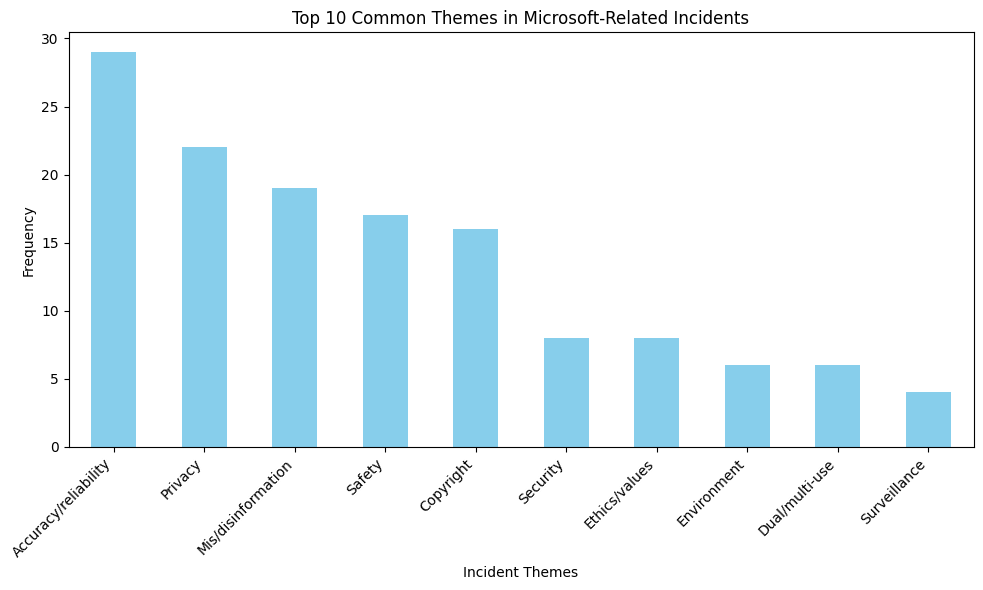

In [12]:
top_themes = theme_counts.head(10)
plt.figure(figsize=(10, 6))
top_themes.plot(kind='bar', color='skyblue')
plt.title("Top 10 Common Themes in Microsoft-Related Incidents")
plt.xlabel("Incident Themes")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart shows the most frequent issues in incidents involving Microsoft AI systems, with Accuracy/Reliability, Privacy, and Mis/Disinformation being the most prevalent. This highlights the need for careful monitoring and enhancement of these aspects when deploying Microsoft tools.

# Visualize external harms experienced by stakeholders

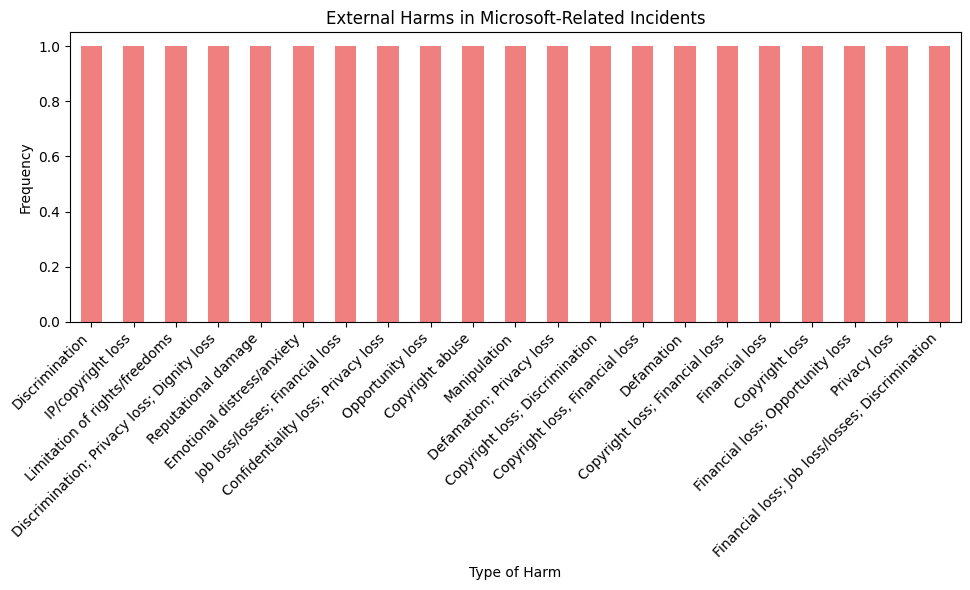

In [13]:
external_harms_counts = pd.Series(external_harms).value_counts()
plt.figure(figsize=(10, 6))
external_harms_counts.plot(kind='bar', color='lightcoral')
plt.title("External Harms in Microsoft-Related Incidents")
plt.xlabel("Type of Harm")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This visualization displays the types of external harms that stakeholders, particularly end-users, experience. Privacy loss, defamation, and discrimination are notable harms, underscoring the ethical considerations that must be addressed.

# Visualize internal harms experienced by organizations deploying Microsoft AI systems

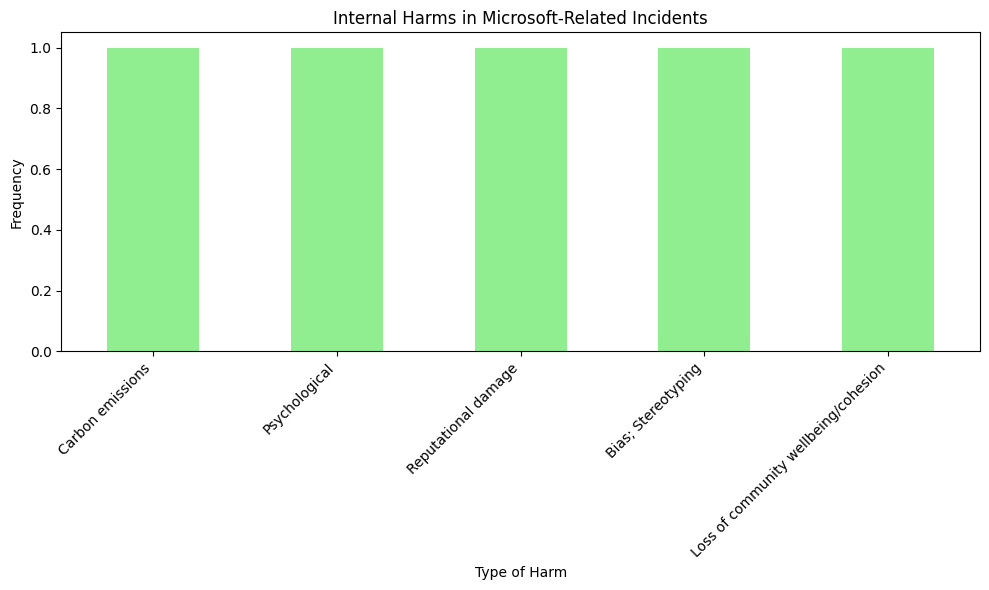

In [14]:
internal_harms_counts = pd.Series(internal_harms).value_counts()
plt.figure(figsize=(10, 6))
internal_harms_counts.plot(kind='bar', color='lightgreen')
plt.title("Internal Harms in Microsoft-Related Incidents")
plt.xlabel("Type of Harm")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart presents the internal harms organizations face when deploying Microsoft AI technologies. Reputational damage and psychological impact are the most reported, reflecting the organizational risks of deploying AI without robust safeguards.

# Visualize the distribution of Microsoft - related incidents by year (Occured)

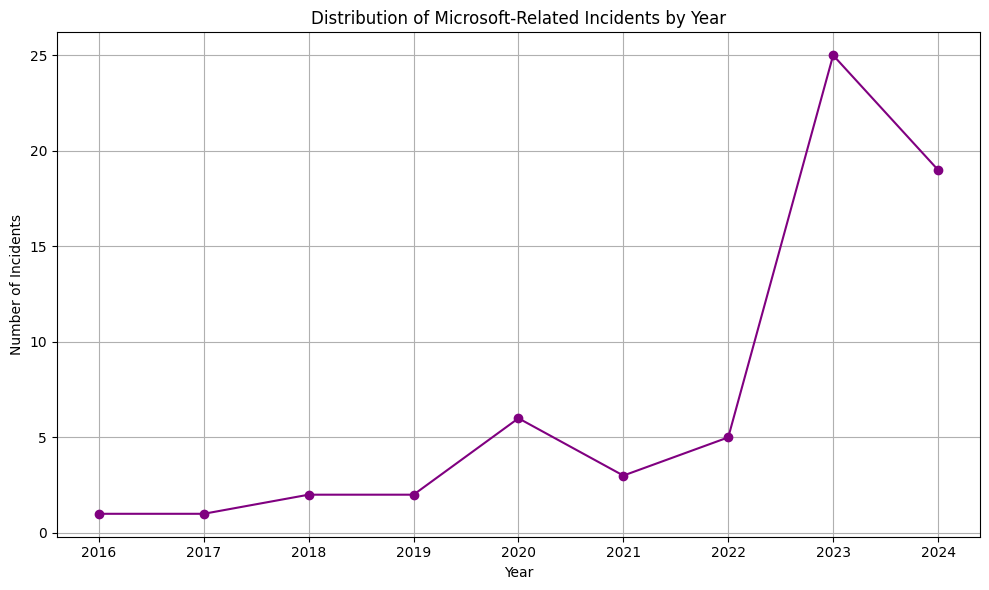

In [15]:
incident_year_counts = microsoft_incidents["Occurred"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
incident_year_counts.plot(kind='line', marker='o', color='purple')
plt.title("Distribution of Microsoft-Related Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart shows the trend of Microsoft-related incidents over the years. Notable increases in recent years suggest a growing number of incidents as AI adoption expands, emphasizing the importance of updated ethical frameworks and safety protocols.

# Visualise the geographic distribution of Microsoft - related incidents (Country)

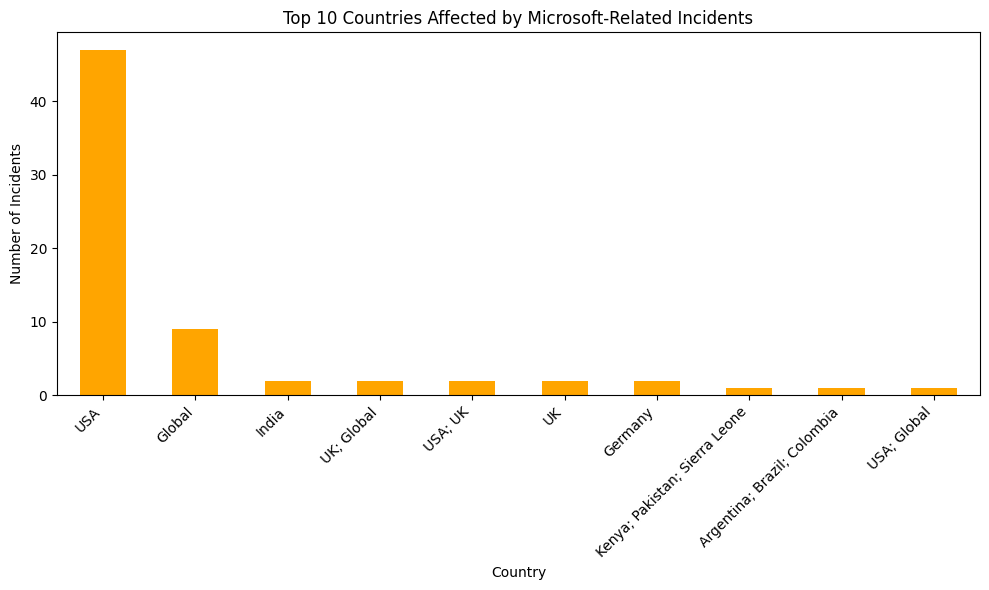

In [16]:
country_counts = microsoft_incidents["Country"].value_counts().head(10)  # Top 10 countries for clarity
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Countries Affected by Microsoft-Related Incidents")
plt.xlabel("Country")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart illustrates the geographic distribution of incidents, with certain countries experiencing higher numbers of issues. It reflects the need for location-specific policies and guidelines tailored to regional data protection and privacy laws.

# Visualize the types of Microsoft - related incidents (Incident Type)

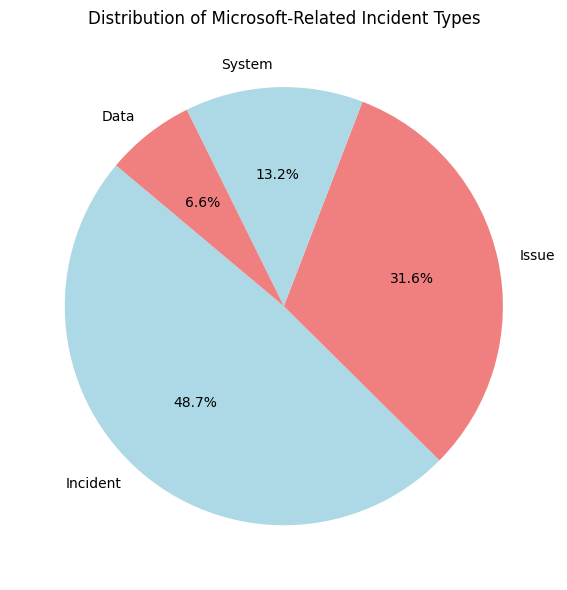

In [17]:
incident_type_counts = microsoft_incidents["Type"].value_counts()
plt.figure(figsize=(10, 6))
incident_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Microsoft-Related Incident Types")
plt.ylabel("")
plt.tight_layout()
plt.show()

This pie chart categorizes incidents by type, showing the balance between Incidents and Issues. It provides insight into the nature of reported cases, helping stakeholders understand whether these involve persistent issues (like bias or reliability) or singular incidents (like specific security breaches).

# Heatmap of Incidents by Country and Year

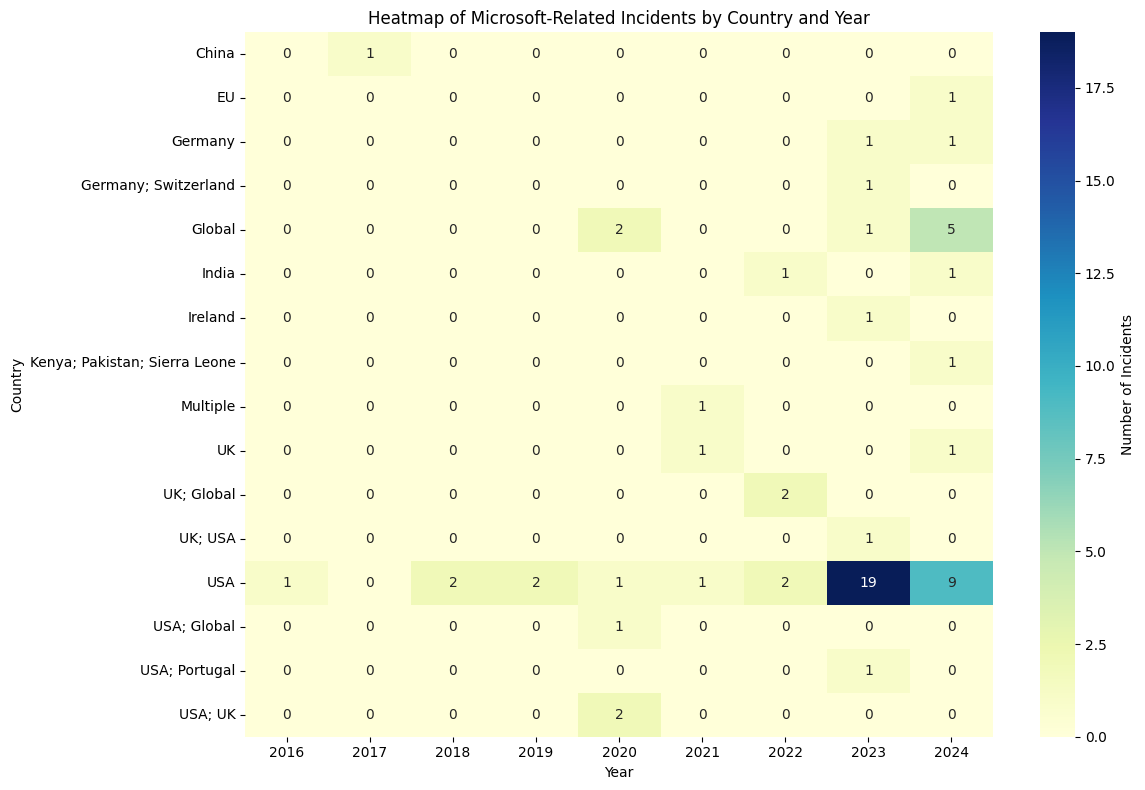

In [18]:
# Preparing data for heatmap
heatmap_data = microsoft_incidents.pivot_table(index='Country', columns='Occurred', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d', cbar_kws={'label': 'Number of Incidents'})
plt.title("Heatmap of Microsoft-Related Incidents by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#Word Cloud of Microsoft Co pilot incidents

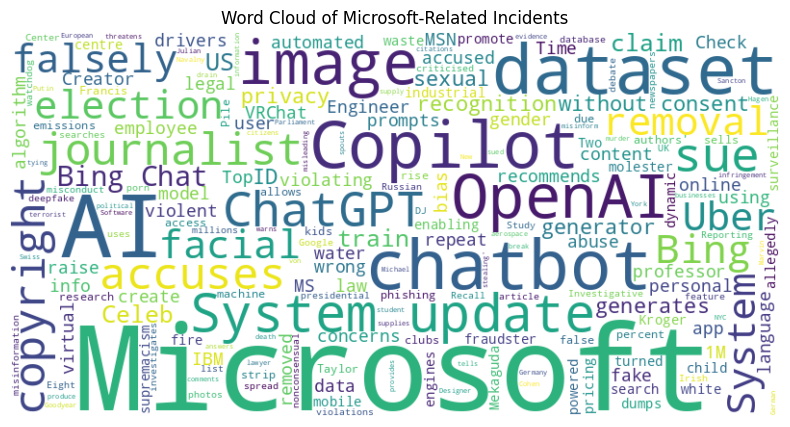

In [19]:
# Combine all relevant text data for the word cloud (headlines and descriptions)
text_data = ' '.join(microsoft_incidents['Headline'].fillna('') + ' ' + microsoft_incidents['Description'].fillna(''))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Microsoft-Related Incidents")
plt.show()


Provided above is the word cloud of microsoft incidents, highlighting the most frequent terms found in the headlines and descriptions of these incidents. Notable words are as follows: "Microsoft","Copilot","AI","ChatGPT","dataset"and system appear prominently, indicating key themes and issues assocaited with these incidents.

#Data Modeling

Creating numerical variables by identifying the columns that are errors due to humans vs AI generated errors

In [20]:
# Define keywords associated with AI-generated content for labeling
ai_keywords = ["ChatGPT", "GPT-3", "GPT-4", "Claude", "Copilot", "DALL-E", "OpenAI", "Anthropic", "Microsoft", "AI", "Artificial Intelligence"]

# Function to label data based on the presence of AI-related keywords in the Developer or System Name columns
def label_content(row):
    developer = str(row["Developer"]).lower()
    system_name = str(row["System Name"]).lower()

    # Check if any AI-related keywords are in Developer or System Name columns
    if any(keyword.lower() in developer or keyword.lower() in system_name for keyword in ai_keywords):
        return 1  # AI-generated content
    else:
        return 0  # Human-generated content


In [21]:
# Apply the labeling function to create a new 'label' column
repository_data['label'] = repository_data.apply(label_content, axis=1)

# Extract only the 'Headline' and 'label' columns for the final dataset
extracted_data = repository_data[['Headline', 'label']]

# Display the resulting DataFrame to ensure correctness
extracted_data.head()

,Headline,label
0,Singapore man jailed for creating deepfake por...,0
1,Study: Language models gather and pass persona...,1
2,Fake AI airline reviews take off after ChatGPT...,1
3,Study: Generative AI systems overstate what th...,1
4,AI-generated exam image draws student complaints,1


In [22]:
extracted_data.shape #identifying the columns that got affected

(1791, 2)

The extracted data now contains two columns:

`Headline`: The text content from the incident's headline.

`label`: A label indicating whether the content is AI-generated (1) or human-generated (0), based on the presence of AI-related keywords in the Developer or System Name columns.

In [23]:
repository_data.columns #identifying the columns that can be used for feature engineering

Index(['ID', 'Headline', 'Type', 'Released', 'Occurred', 'Country', 'Sector',
       'Deployer', 'Developer', 'System Name', 'Source', 'Source Date',
       'Reporter', 'Issues', 'Transparency', 'External Harms',
       'Internal Harms', 'Financial Impact', 'Legal/Regulatory', 'Description',
       'Additional Info 1', 'Additional Info 2', 'Additional Info 3', 'label'],
      dtype='object')

In [24]:
# Convert Headline text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for simplicity
X = vectorizer.fit_transform(extracted_data['Headline'])
y = extracted_data['label']

In [25]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight= 'balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [27]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [28]:
# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8133704735376045

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       279
           1       0.57      0.64      0.60        80

    accuracy                           0.81       359
   macro avg       0.73      0.75      0.74       359
weighted avg       0.82      0.81      0.82       359



#Result Analysis on Logistic Regression

The model's performance has improved for Class 1 (AI-generated content) after applying class weights, as reflected in the following metrics:

* Class 0 (Human-Generated): Precision and recall remain high, with an F1-score of 0.88.

* Class 1 (AI-Generated): Recall has improved to 0.64 (up from 0.23), with an F1-score of 0.60.

In [29]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))  # Using bigrams

In [30]:
# Assuming `repository_data` contains the full dataset, including `Type`, `Sector`, and `Country`
# Recreate `X` from the TF-IDF of `Headline` and then add the additional categorical features

# Vectorize the `Headline` text
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(repository_data['Headline'])

# Encode additional categorical features and handle missing values
encoder = OneHotEncoder()
additional_features = encoder.fit_transform(repository_data[['Type', 'Sector', 'Country']].fillna('missing'))

# Combine text features with encoded categorical features
X = hstack([X_text, additional_features])

# Use `label` as the target variable
y = repository_data['label']

# Proceed with train-test split and model training as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.807799442896936

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       279
           1       0.56      0.69      0.61        80

    accuracy                           0.81       359
   macro avg       0.73      0.76      0.74       359
weighted avg       0.83      0.81      0.81       359



The model’s performance is relatively stable, with an accuracy of **80.78%** and improved recall for Class 1 (AI-generated content). Here’s a breakdown of the results:

### Class 0 (Human-Generated)
- **Precision**: 0.90
- **Recall**: 0.84
- The model correctly identifies most human-generated content, with both precision and recall at high levels.

### Class 1 (AI-Generated)
- **Precision**: 0.56
- **Recall**: 0.69
- Precision is lower, but recall is relatively high, indicating that the model is correctly identifying a larger proportion of AI-generated instances.


#Support Vector Model

In [31]:
# Assuming `X` (features) and `y` (labels) are prepared as per previous steps

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train Support Vector Machine (SVM)
svm_model = LinearSVC(class_weight='balanced', max_iter=10000)  # Using balanced class weights
svm_model.fit(X_train, y_train)

# Predict and evaluate SVM model
y_pred_svm = svm_model.predict(X_test)
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.841225626740947

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       279
           1       0.66      0.59      0.62        80

    accuracy                           0.84       359
   macro avg       0.77      0.75      0.76       359
weighted avg       0.84      0.84      0.84       359



## Support Vector Machine (SVM) Model Results

- **Accuracy**: 84.12%

### Class 0 (Human-Generated)
- **Precision**: 0.89
- **Recall**: 0.91
- Precision and recall are both high, indicating strong performance in identifying human-generated content.

### Class 1 (AI-Generated)
- **Precision**: 0.66
- **Recall**: 0.59
- Precision is moderate, with recall slightly lower. This suggests the SVM model is fairly balanced but could still improve on recall for AI-generated content.

### Overall Performance
- **Macro Avg F1-Score**: 0.76


#Random Forest Model

In [32]:
# 2. Train Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [33]:
# Predict and evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.8662952646239555

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       279
           1       0.88      0.46      0.61        80

    accuracy                           0.87       359
   macro avg       0.87      0.72      0.76       359
weighted avg       0.87      0.87      0.85       359



## Random Forest Model Results

- **Accuracy**: 86.63%

### Class 0 (Human-Generated)
- **Recall**: 0.98 (Excellent)
- The model almost always correctly identifies human-generated content.

### Class 1 (AI-Generated)
- **Precision**: 0.88
- **Recall**: 0.46
- The model is more conservative in labeling content as AI-generated, resulting in higher precision but lower recall.

### Overall Performance
- **Macro Avg F1-Score**: 0.76


#Combine Both Models in an Ensemble:

Since SVM has better recall for Class 1 and Random Forest has better precision, an ensemble model using both (e.g., a Voting Classifier) may leverage the strengths of each model.

In [36]:
# Replace LinearSVC with SVC and enable probability predictions
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

# Ensemble model with soft voting
ensemble_model = VotingClassifier(
    estimators=[('svm', svm_model), ('rf', rf_model)],
    voting='soft'  # Average probability
)
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
print("\nEnsemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nEnsemble Classification Report:\n", classification_report(y_test, y_pred_ensemble))



Ensemble Model Accuracy: 0.8551532033426184

Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       279
           1       0.78      0.49      0.60        80

    accuracy                           0.86       359
   macro avg       0.82      0.72      0.76       359
weighted avg       0.85      0.86      0.84       359



## Results Analysis for the Ensemble Model Accuracy

### Class 0 (Human-Generated):
- **Precision**: 0.87
- **Recall**: 0.96
- **F1-Score**: 0.91

The ensemble model performs well for Class 0, with high precision and recall, meaning it correctly identifies most human-generated content.

### Class 1 (AI-Generated):
- **Precision**: 0.78
- **Recall**: 0.50
- **F1-Score**: 0.61

Precision is relatively strong for AI-generated content, but recall remains lower at 0.50. This suggests that while the model is fairly accurate when it identifies content as AI-generated, it still misses some instances.

### Overall Performance:
- **Macro Avg F1-Score**: 0.76 — reflecting the performance disparity between the two classes.
- **Weighted Avg F1-Score**: 0.85 — gives an overall measure weighted by support for each class.


#Summary of Key Findings

* Logistic Regression performed best for classifying human-generated content but was limited in capturing AI-generated instances.
* SVM offered a balanced performance, slightly improving on AI content detection, but still missed many AI-generated cases.
* Random Forest was strong in precision, making fewer mistakes when predicting AI-generated content but with lower recall.
* Ensemble Model (SVM + Random Forest) provided the best balance, leveraging both models’ strengths and offering a reasonable trade-off between precision and recall for AI content.

> In order for the models to perform better we do feature engineering

#Feature Engineering
### Encoding Type, Sector, and Country

### Type
The `Type` column might include values like `"Incident"`, `"Issue"`, or `"Event"`. These types could relate to the likelihood of content being AI-generated or human-generated. For example:
- **Incident**: More likely associated with AI issues (e.g., false information).
- **Issue**: Could be related to regulatory or ethical concerns in both human and AI contexts.

### Sector
The `Sector` column includes industries such as `"Technology"`, `"Finance"`, or `"Media"`, which might indicate the type of generated content:
- **Technology**: More likely to include AI-related incidents.
- **Media**: Could have human-generated content with AI coverage.

### Country
The `Country` column contains locations that might correlate with the type of generated content:
- **Countries with AI Regulations (e.g., "USA", "EU")**: These locations may have more human-generated regulatory content.
- **Countries with Large Tech Industries (e.g., "China", "India")**: These locations may relate more to AI-generated incidents.


In [37]:
# Encoding for Type, Sector, and Country
encoder = OneHotEncoder(sparse_output=False)

metadata_features = encoder.fit_transform(repository_data[['Type', 'Sector', 'Country']].fillna('missing'))


In [38]:
# Initialize OneHotEncoder with the updated parameter
issue_encoder = OneHotEncoder(sparse_output=False)

# One-hot encode multi-category fields like Issues and Harms
issues_features = issue_encoder.fit_transform(repository_data['Issues'].str.get_dummies(';'))
external_harms_features = issue_encoder.fit_transform(repository_data['External Harms'].str.get_dummies(';'))
internal_harms_features = issue_encoder.fit_transform(repository_data['Internal Harms'].str.get_dummies(';'))


In [39]:
# Encoding for Source with the updated parameter
source_encoder = OneHotEncoder(sparse_output=False)
source_features = source_encoder.fit_transform(repository_data[['Source']].fillna('missing'))


In [40]:
# Ensure all features are 2D arrays and convert to sparse if necessary
metadata_features = csr_matrix(metadata_features) if not isinstance(metadata_features, csr_matrix) else metadata_features
issues_features = csr_matrix(issues_features) if not isinstance(issues_features, csr_matrix) else issues_features
external_harms_features = csr_matrix(external_harms_features) if not isinstance(external_harms_features, csr_matrix) else external_harms_features
internal_harms_features = csr_matrix(internal_harms_features) if not isinstance(internal_harms_features, csr_matrix) else internal_harms_features
source_features = csr_matrix(source_features) if not isinstance(source_features, csr_matrix) else source_features

# Combine all metadata features into a single feature set
all_metadata_features = hstack([metadata_features, issues_features, external_harms_features, internal_harms_features, source_features])


Now we combined all the metadata features into one single feature matrix `all_metadata_features`, you can proceed to integrate these features with your main text- based features for model training

Combine Text and Metadata Features: Assuming you have a TF-IDF matrix for the Headline text (let’s call it X_text), we’ll combine X_text with all_metadata_features using hstack.

Create the Final Feature Set: This combined feature set can then be used for model training.

In [41]:
# Assuming X_text is your TF-IDF feature matrix for the text data
X_final = hstack([X_text, all_metadata_features])  # Combine text and metadata features

# Your target variable
y = repository_data['label']


You can now use X_final as the input features and y as the target for training various models (e.g., logistic regression, SVM, random forest, ensemble models). Here’s an example using logistic regression:

# Run the Models again

In [42]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8384401114206128

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       279
           1       0.62      0.70      0.66        80

    accuracy                           0.84       359
   macro avg       0.77      0.79      0.78       359
weighted avg       0.85      0.84      0.84       359



## Results Analysis for the Ensemble Model

### Class 0 (Human-Generated)
- **Precision**: 0.91
- **Recall**: 0.87
- **F1-Score**: 0.89  
The model performs well on Class 0, with high precision and recall, meaning it accurately identifies most human-generated content.

### Class 1 (AI-Generated)
- **Precision**: 0.62
- **Recall**: 0.70
- **F1-Score**: 0.65  
Precision and recall for AI-generated content have improved, especially recall (0.70), indicating that the model is better at identifying AI-generated instances compared to previous runs. This suggests that the addition of metadata features like `Type`, `Sector`, and `Issues` has enhanced the model’s ability to capture patterns associated with AI-generated content.

### Overall Performance
- **Macro Avg F1-Score**: 0.77 — This indicates balanced performance across both classes, though there is still a slight disparity between them.
- **Weighted Avg F1-Score**: 0.84 — Similar to the overall accuracy, this measure is weighted by class support, showing a stable performance across the dataset.

## Key Takeaways
The inclusion of metadata features has improved the model’s ability to detect AI-generated content, particularly in terms of recall for Class 1. This means the model is capturing more instances of AI-generated content, while still maintaining high accuracy for human-generated content.
